<a href="https://colab.research.google.com/github/woodRock/grokking-deep-learning/blob/main/chapter_4_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 | Gradient Descent

Error is a way to measure how much you missed. There are multiple ways to calculate this error, as you'll learn later. This one is mean squared error (MSE). Squaring forces the error to be positive - we want errors to always be positive so they don't accidentally cancel each other out when you average them. The $(.)^2$ operation in $MSE$ magnifies large errors and reduces small errors. 

In [1]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8 

pred = input * knob_weight 
error = (pred - goal_pred) ** 2 
print(error)

0.30250000000000005


## Hot and Cold Learning

Hot and cold learning means wiggling the weights to see which direction reduces the error the most, moving the weights in that direction, and repeating until the error gets to 0.

0.001
0.002
0.003
0.004


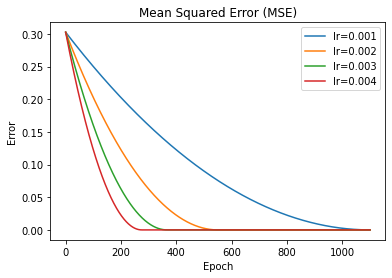

In [2]:
epochs = 1101
errors = {"0.001": [], "0.002": [], "0.003": [], "0.004": []}

for step_amount in [0.001, 0.002, 0.003, 0.004]: 
    weight = 0.5
    input = 0.5
    goal_prediction = 0.8
    err = []

    for iteration in range(epochs): 
        prediction = input * weight 
        error = (prediction - goal_prediction) ** 2 
        err.append(error)

        if iteration == epochs:
            print(f"Error: {error} Prediction: {prediction}")
        up_prediction = input * (weight + step_amount)
        up_error = (goal_prediction - up_prediction) ** 2
        down_prediction = input * (weight - step_amount)
        down_error = (goal_prediction - down_prediction) ** 2

        if (down_error < up_error):
            weight = weight - step_amount
            
        if (down_error > up_error):
            weight = weight + step_amount

    errors[str(step_amount)] = err


import matplotlib.pyplot as plt

for step, error in errors.items():
    print(step)
    plt.plot(error, label=f"lr={step}")

plt.title("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

## Error as a Vector | Both Direction and Amount of Error

A vector $\vec{v}$ has direction $\theta$ and magnitude $|\vec{v}|$. If we scale our weight change to be proportionate to the error, by making an error a vector with direction and magnitude, the network converges with 1101 (hot and cold) / 20 (vector) = 1.8% of the epochs of the hot and cold method.

The pure error $\hat{y} - y$ is multiplied by the input $x$, this performs scaling, negative reversal, and stopping, transforming the pure error into the weight update $\Delta \beta$.

Where: 
- pure error $\hat{y} - y$ indicates the raw direction and amount you missed. 
- stopping - If the input is 0, you don't learn anything. 
- negative reversal - The negative reversal ensures the weight moves in the correct direction, even for negative inputs. 
- scaling - big inputs, correspond to big weights.
    

No handles with labels found to put in legend.


Error: 5.408208020258491e-06 Prediction: 0.7976744445781151


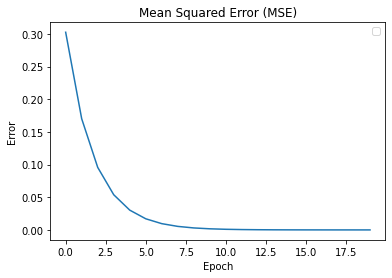

In [3]:
epochs = 20
weight = 0.5
input = 0.5
goal_prediction = 0.8
errors = []

for iteration in range(epochs): 
    prediction = input * weight 
    error = (prediction - goal_prediction) ** 2 
    direction_and_amount = (prediction - goal_prediction) * input # Scaling, negative reversal, and stopping.
    weight = weight - direction_and_amount
    errors.append(error)

    if iteration == epochs - 1:
        print(f"Error: {error} Prediction: {prediction}")

import matplotlib.pyplot as plt

plt.plot(errors)
plt.title("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

For any input and output, an exact relationshipis defined between error and weight, foudn by combining the prediction and error formulas. In this case: 

$ error = ((0.5 * weight) - 0.8)^2 $

$ error = ((input * weight) - goal)^2$ 

Alpha $\alpha$ is the learning rate, this determines the speed at which the neuron learns. 

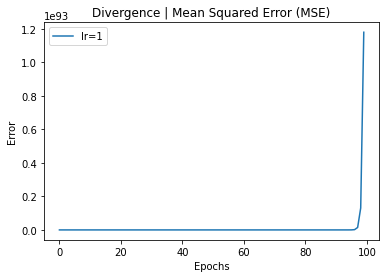

In [4]:
weight, goal_pred, input = (0.5, 0.8, 2)
errors = []

for iteration in range(100):
    pred = input * weight 
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred 
    weight_delta = delta * input
    weight -=  weight_delta
    
    if iteration == 100: 
        print(f"Error: {error} Prediction {pred}")
    errors.append(error)

plt.plot(errors, label=f"lr={1}")
plt.title("Divergence | Mean Squared Error (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

"A neural network is really just one thing: a bunch of weights you use to compute an error function." (Trask 2019)

And for any error function, you can compute the relationship between any weight and the final error of the network. With this information you can change any weight to reduce the error to 0.

A _derivitive_ is the relationship between two variables in a function so you can know how much one changes when you change the other.

You can take each weight, calculate its derivitive with respect to the error, and then change weight in the opposite direction of that slope. That will move you towards a minimum.

# Divergence 

Sometimes neural networks explode in value. For example, If we set the input to 2, and weight to 0.5, the network breaks. 

Sometimes the input is too large, which makes the weight updates too large. The network overcorrects, and cannot find a small error. This causes a phenomenon called _divergence_. When the derivitive is really big, and the error is small, we get divergence. This results in overcorrections, that produce a larger derivitive, which is a runaway freight train. 

We employ alpha $\alpha$, the learning rate, to counteract divergence. This is a coefficient value between 0 and 1, that controls the rate at which the network learns. Even state-of-the-art neural networks determine $\alpha$ with black magic (guessing). A good starting point is $\alpha = 1\times10^-3$. 

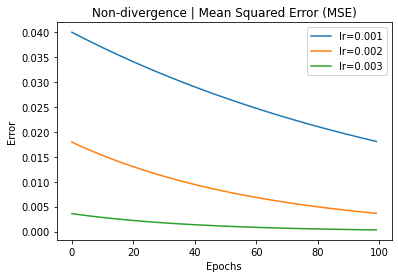

In [5]:
weight, goal_pred, input = (0.5, 0.8, 2)

for alpha in [0.001, 0.002, 0.003]:
    errors = []
    
    for iteration in range(100):
        pred = input * weight 
        error = (pred - goal_pred) ** 2
        delta = pred - goal_pred 
        weight_delta = delta * input
        weight -= alpha * weight_delta
        
        if iteration == 100: 
            print(f"Error: {error} Prediction {pred}")
        errors.append(error)
    plt.plot(errors, label=f"lr={alpha}")

plt.title("Non-divergence | Mean Squared Error (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()